In [ ]:
import tensorflow as tf
data = tf.keras.datasets.fashion_mnist

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True


callbacks = myCallback()


(training_images, training_labels), (test_images, test_labels) = data.load_data()
print(type(training_images))
training_images=training_images.reshape(60000, 28, 28, 1)
training_images  = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_checksums = True
print(tfds.__version__)
data, info = tfds.load("cnn_dailymail", with_info=True)

In [ ]:
help(tfds.load)

In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) 
model = tf.keras.Sequential([l0])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
model.predict([100.0])

Feature: The input(s) to our model

Examples: An input/output pair used for training

Labels: The output of the model

Layer: A collection of nodes connected together within a neural network.

Model: The representation of your neural network

Dense and Fully Connected (FC): Each node in one layer is connected to each node in the previous layer.

Weights and biases: The internal variables of model

Loss: The discrepancy between the desired output and the actual output

MSE: Mean squared error, a type of loss function that counts a small number of large discrepancies as worse than a large number of small ones.

Gradient Descent: An algorithm that changes the internal variables a bit at a time to gradually reduce the loss function.

Optimizer: A specific implementation of the gradient descent algorithm. (There are many algorithms for this. In this course we will only use the “Adam” Optimizer, which stands for ADAptive with Momentum. It is considered the best-practice optimizer.)

Learning rate: The “step size” for loss improvement during gradient descent.

Batch: The set of examples used during training of the neural network

Epoch: A full pass over the entire training dataset

Forward pass: The computation of output values from input

Backward pass (backpropagation): The calculation of internal variable adjustments according to the optimizer algorithm, starting from the output layer and working back through each layer to the input.


Flattening: The process of converting a 2d image into 1d vector
ReLU: An activation function that allows a model to solve nonlinear problems
Softmax: A function that provides probabilities for each possible output class
Classification: A machine learning model used for distinguishing among two or more output categories

Training Set: The data used for training the neural network.
Test set: The data used for testing the final performance of our neural network.


Regression: A model that outputs a single value. For example, an estimate of a house’s value.

Classification: A model that outputs a probability distribution across several categories. For example, in Fashion MNIST, the output was 10 probabilities, one for each of the different types of clothing. Remember, we use Softmax as the activation function in our last Dense layer to create this probability distribution.

CNNs: Convolutional neural network. That is, a network which has at least one convolutional layer. A typical CNN also includes other types of layers, such as pooling layers and dense layers.

Convolution: The process of applying a kernel (filter) to an image

Kernel / filter: A matrix which is smaller than the input, used to transform the input into chunks

Padding: Adding pixels of some value, usually 0, around the input image

Pooling The process of reducing the size of an image through downsampling.There are several types of pooling layers. For example, average pooling converts many values into a single value by taking the average. However, maxpooling is the most common.

Maxpooling: A pooling process in which many values are converted into a single value by taking the maximum value from among them.

Stride: the number of pixels to slide the kernel (filter) across the image.

Downsampling: The act of reducing the size of an image

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

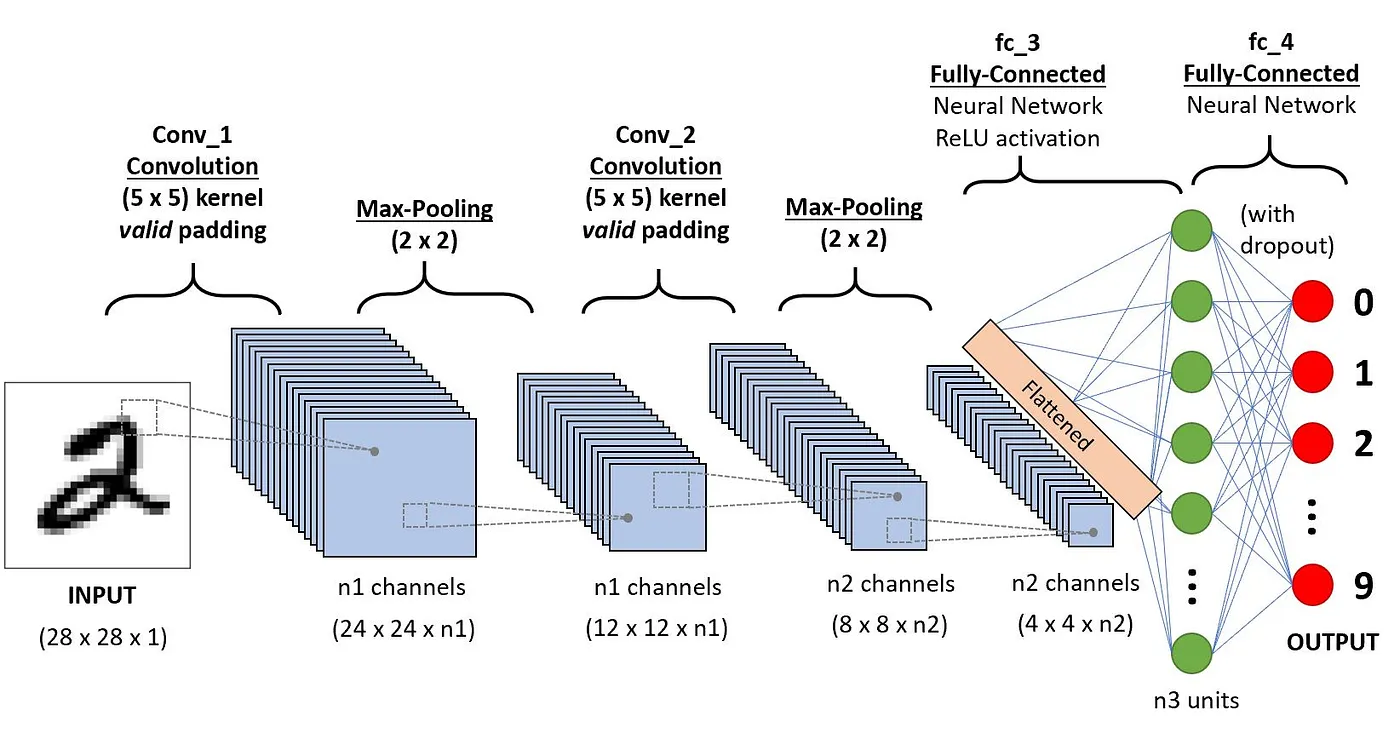

https://github.com/vdumoulin/conv_arithmetic?source=post_page-----3bd2b1164a53--------------------------------

In this lesson we saw three different techniques to prevent overfitting:

Early Stopping: In this method, we track the loss on the validation set during the training phase and use it to determine when to stop training such that the model is accurate but not overfitting.

Image Augmentation: Artificially boosting the number of images in our training set by applying random image transformations to the existing images in the training set.

Dropout: Removing a random selection of a fixed number of neurons in a neural network during training.

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

CNNs with RGB Images of Different Sizes:

Resizing: When working with images of different sizes, you must resize all the images to the same size so that they can be fed into a CNN.

Color Images: Computers interpret color images as 3D arrays.

RGB Image: Color image composed of 3 color channels: Red, Green, and Blue.

Convolutions: When working with RGB images we convolve each color channel with its own convolutional filter. Convolutions on each color channel are performed in the same way as with grayscale images, i.e. by performing element-wise multiplication of the convolutional filter (kernel) and a section of the input array. The result of each convolution is added up together with a bias value to get the convoluted output.

Max Pooling: When working with RGB images we perform max pooling on each color channel using the same window size and stride. Max pooling on each color channel is performed in the same way as with grayscale images, i.e. by selecting the max value in each window.

Validation Set: We use a validation set to check how the model is doing during the training phase. Validation sets can be used to perform Early Stopping to prevent overfitting and can also be used to help us compare different models and choose the best one.

<BR>
Methods to Prevent Overfitting:

Early Stopping: In this method, we track the loss on the validation set during the training phase and use it to determine when to stop training such that the model is accurate but not overfitting.

Image Augmentation: Artificially boosting the number of images in our training set by applying random image transformations to the existing images in the training set.

Dropout: Removing a random selection of a fixed number of neurons in a neural network during training.

Transfer Learning: A technique that reuses a model that was created by machine learning experts and that has already been trained on a large dataset. When performing transfer learning we must always change the last layer of the pre-trained model so that it has the same number of classes that we have in the dataset we are working with.

Freezing Parameters: Setting the variables of a pre-trained model to non-trainable. By freezing the parameters, we will ensure that only the variables of the last classification layer get trained, while the variables from the other layers of the pre-trained model are kept the same.

MobileNet: A state-of-the-art convolutional neural network developed by Google that uses a very efficient neural network architecture that minimizes the amount of memory and computational resources needed, while maintaining a high level of accuracy. MobileNet is ideal for mobile devices that have limited memory and computational resources.